# Root Mean Square Error:

![](https://www.machinelearningplus.com/wp-content/uploads/2019/11/PCA_Scatterplot-min.png)

## Outline:
* What is an error?
* What is Mean Absolute Error?
* What is Mean Square Error?
* What is Root Mean Square Error?
* Practical

## What is Error:
<img src='https://images.squarespace-cdn.com/content/v1/58c95854c534a56689231265/1531151917631-MP881P65V9DJT0D4G0X9/ke17ZwdGBToddI8pDm48kPmLlvCIXgndBxNq9fzeZb1Zw-zPPgdn4jUwVcJE1ZvWQUxwkmyExglNqGp0IvTJZamWLI2zvYWH8K3-s_4yszcp2ryTI0HqTOaaUohrI8PIFMLRh9LbupWL4Bv1SDYZc4lRApws2Snwk0j_RSxbNHMKMshLAGzx4R3EDFOm1kBS/Figura0.jpg' width='600' hight='600'>

### Note:
* The difference between Actual value (Blue Point Data) and the predicted value (Corresponding point on Red line) is called an error.
* We always try to minimize or make it Zero.

## What is the difference between MAE, MSE & RMSE?
After looking at the data, seeing a linear relationship, training and testing our model, we can understand how well it predicts by using some metrics. For regression models, three evaluation metrics are mainly used:

### Mean Absloute Error (MAE):
When we subtract the predicted values from the actual values, obtaining the errors, sum the absolute values of those errors and get their mean. This metric gives a notion of the overall error for each prediction of the model, the smaller (closer to 0) the better.
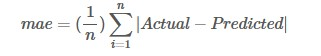

### Mean Squared Error (MSE): 
It is similar to the MAE metric, but it squares the absolute values of the errors. Also, as with MAE, the smaller, or closer to 0, the better. The MSE value is squared so as to make large errors even larger. One thing to pay close attention to, it that it is usually a hard metric to interpret due to the size of its values and of the fact that they aren't in the same scale of the data.
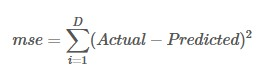

### Root Mean Square Error (RMSE):
Tries to solve the interpretation problem raised with the MSE by getting the square root of its final value, so as to scale it back to the same units of the data. It is easier to interpret and good when we need to display or show the actual value of the data with the error. It shows how much the data may vary, so, if we have an RMSE of 4.35, our model can make an error either because it added 4.35 to the actual value, or needed 4.35 to get to the actual value. The closer to 0, the better as well.
<img src='https://miro.medium.com/max/1040/0*at-j68ROeSmiruDE.png' width='400' hight='400' > 


We can use any of those three metrics to compare models (if we need to choose one). We can also compare the same regression model with different argument values or with different data and then consider the evaluation metrics. This is known as hyperparameter tuning - tuning the hyperparameters that influence a learning algorithm and observing the results.

When choosing between models, the ones with the smallest errors, usually perform better. When monitoring models, if the metrics got worse, then a previous version of the model was better, or there was some significant alteration in the data for the model to perform worse than it was performing.

Luckily, we don't have to do any of the metrics calculations manually. The Scikit-Learn package already comes with functions that can be used to find out the values of these metrics for us. Let's find the values for these metrics using our test data. First, we will import the necessary modules for calculating the MAE and MSE errors. Respectively, the mean_absolute_error and mean_squared_error:

## Note:
* To choose the best model we calculate these error. (Mainly RMSE)
* The lowest is best infact we try to choose Zero Error Model.
* If the `Error > 0` then model is `Overfit`.
* If the `Error < 0` then model is `underfit`.
* If the `Error = 0` then model is `bestfit`.

## Practical: We use the Banglore House Prediction cleaned data

### Step 1: Loading the libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Loading The Dataset:

In [2]:
df=pd.read_csv('Cleaned Banglore House Price Prediction Data.csv')

In [3]:
df.head()

,area_type,availability,location,bath,balcony,price,new_size,new_total_sqft,price_per_sqft
0,3,38,341,2.0,1.0,39.07,2,1056.0,3699.810606
1,2,77,251,5.0,3.0,120.00,4,2600.0,4615.384615
2,0,77,964,2.0,3.0,62.00,3,1440.0,4305.555556
3,3,77,629,3.0,1.0,95.00,3,1521.0,6245.890861
4,3,77,592,2.0,1.0,51.00,2,1200.0,4250.000000


#### Note:
* This is our cleaned data we have cleaned this in Linera Regression Model.
* Now again we use `Linear Regression` use perform the `Ridge & Lasso` techniques.

### Step 3: Performing The Linear Regression Method:

In [5]:
# Spliting the dataset into Target (y) and Features(X) variables:
X=df.drop('price',axis=1)
y=df['price']

print('Shape of X:', X.shape)
print('Shape of y:',y.shape)

Shape of X: (11018, 8)
Shape of y: (11018,)


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# Spliting the data into train & test part:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=6)

print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (8814, 8)
Shape of y_train =  (8814,)
Shape of X_test =  (2204, 8)
Shape of y_test =  (2204,)


In [8]:
'''
Feature scalling of the dataset: We'll normalize the different numerica value of the data 
                                 so that machine can easly understand.
'''
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

In [9]:
# Linear Regression ML Model Training:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [10]:
'''Exploring The Trained Data
'''
# Seeing the coefficent values:
lr.coef_

array([ 0.15192576, -0.42192927, -0.22437487, -0.17351644,  0.15535644,
       -4.40445112, 55.26726976, 25.18508851])

In [11]:
# Seeing the intersect value:
lr.intercept_

82.08727989562063

In [12]:
# Testing the model:
lr.predict(X_test)

array([107.6745738 ,  34.500194  ,  60.94472328, ...,  82.4907132 ,
       147.67319159, 163.35794178])

In [13]:
# Verifing the actual values:
y_test

4064     104.00
7855      42.81
10856     61.11
4491      47.00
9184      33.50
          ...  
3991      75.00
26        57.39
9239      80.00
8944     150.00
10194    170.00
Name: price, Length: 2204, dtype: float64

In [14]:
# Checking the accuracy of the model:
lr.score(X_test,y_test)

0.94471512931249

### Conclusion:
* Our model is give us `94.4715%` accureacy which is impressive.
* Now we need to evaluate the model.

### Step 4: Model Evaluation:

### Root Mean Square Error:

In [18]:
# Predict the price (y^)
y_pred = lr.predict(X_test)
y_pred

array([107.6745738 ,  34.500194  ,  60.94472328, ...,  82.4907132 ,
       147.67319159, 163.35794178])

In [19]:
# Actual price (y)
y_test

4064     104.00
7855      42.81
10856     61.11
4491      47.00
9184      33.50
          ...  
3991      75.00
26        57.39
9239      80.00
8944     150.00
10194    170.00
Name: price, Length: 2204, dtype: float64

In [20]:
# Using sklearn we use MSE:
from sklearn.metrics import mean_squared_error #Max Use

In [21]:
mse=mean_squared_error(y_test, y_pred)
rmse= np.sqrt(mse)

print('MSE=',mse)
print('RMSE=',rmse)

MSE= 185.46172757515046
RMSE= 13.61843337447999


### Conclusion:
* Our RMSE is `13.61` which good but we need to reduce this using other model or revisit the cleaning data.